In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from pathlib import Path

In [4]:
d = Path(Path.home(),'Downloads','iris_.csv')

In [5]:
dataset = pd.read_csv(d)

In [6]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = dataset.iloc[:,:-1]

In [8]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [9]:
y = dataset.iloc[:,1:5]

In [10]:
y

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder_x = LabelEncoder()

In [13]:
X = X.apply(LabelEncoder().fit_transform)

In [14]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,8,14,4,1
1,1,6,9,4,1
2,2,4,11,3,1
3,3,3,10,5,1
4,4,7,15,4,1
...,...,...,...,...,...
145,145,24,9,28,19
146,146,20,4,26,15
147,147,22,9,28,16
148,148,19,13,30,19


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
regressor = DecisionTreeRegressor()

In [18]:
regressor.fit(X.iloc[:,1:5],y)

DecisionTreeRegressor()

In [19]:
X_in = np.array([1,1,0,0])

In [20]:
y_pred = regressor.predict([X_in])

In [21]:
y_pred

array([[4.5, 2.3, 1.3, 0.3]])

In [22]:
from six import StringIO

In [23]:
from IPython.display import Image

In [24]:
from sklearn.tree import export_graphviz

In [25]:
import pydotplus

In [26]:
dot_data = StringIO()

In [27]:
export_graphviz(regressor,out_file = dot_data , filled = True , rounded = True , special_characters = True)

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [29]:
from sklearn.tree import plot_tree

In [30]:
import matplotlib.pyplot as plt

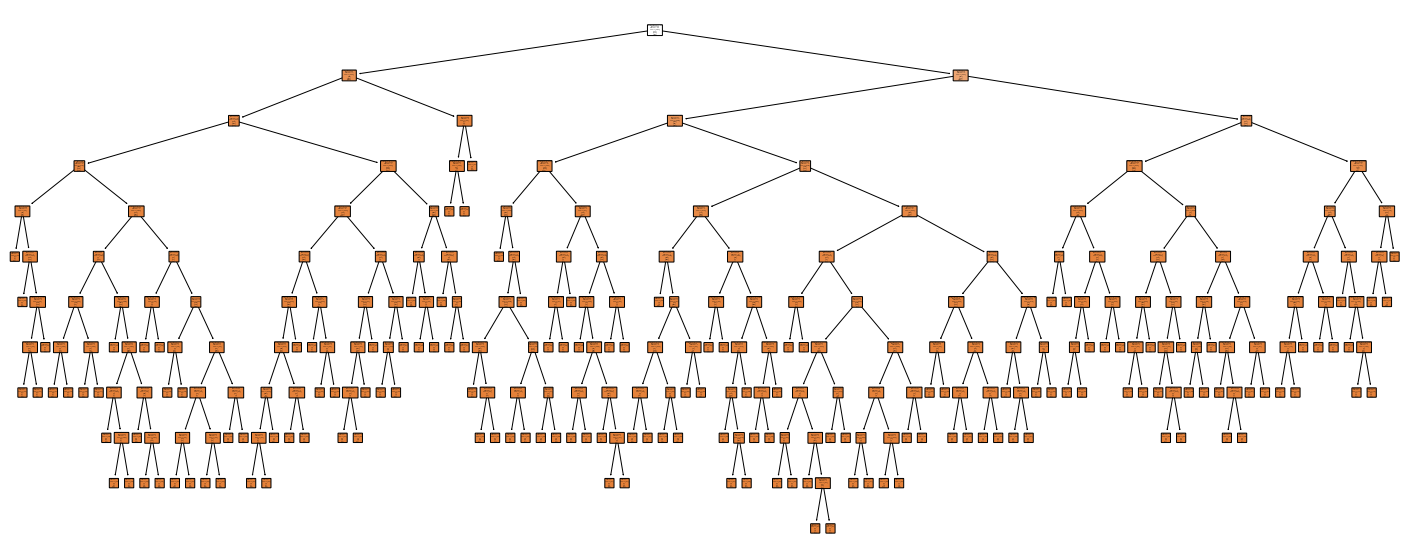

In [31]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor,
             feature_names=dataset.columns,
             class_names=["Iris-setosa","Iris-vercicolor","Iris-verginica"],
             filled=True,
             rounded=True)
plt.savefig('intern_DT.pdf')
